# Variational Autoencoder Data: pianoroll
## CVAE  using trained model for generating mus examples


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import muspy 
import pypianoroll 
from tensorflow.keras.utils import  to_categorical
print ('muspy ver ' , muspy.__version__ )

from numpy import load
import numpy as np
import time
import sys
import os
import random
tf.random.set_seed(33)
os.environ['PYTHONHASHSEED'] = str(33)
np.random.seed(33)
random.seed(33)

print("TF ver:",tf.__version__)
#import keras
print("Keras ver:", keras.__version__)

muspy ver  0.5.0
TF ver: 2.10.0
Keras ver: 2.10.0


## Ładowanie danych 

In [3]:
import sys; sys.path.insert(0, '..') # JGadd parent folder path where lib folder is Dodanie wyższej ścieżki do PATH
from main import load_data, load_data_train_test, load_data_emo, shuffle_data, labels_to_categorical
from model.models import VAE, CVAE
from config import MODEL_CONFIG, DATA_CONFIG, SETUP, TRAIN_CONFIG, EXP_CONFIG
DATA_CONFIG['training_data'] = '.' + SETUP['training_data']  # dodanie . go ścieżki katalogu

# train_X = load_data()
# train_X, test_X = load_data_train_test()
train_X, train_y =  load_data_emo() # """Ładowanie danych z podziałem oznaczonych emo"""


[*] Loading data...
train_X.shape (338, 64, 60)
train_X.shape (338, 64, 60, 1)
train_y.shape (338,)
train_y: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3]
train_y: 
 [1 3 2 0 2 2 0 3 2 0 1 2 3 0 1 0 2 1 0 0 3 3 3 1 1 1 1 1 0 0 1 1 2 0 3 1 3
 3 0 0 2 2 2 2 3 0 1 0 1 1 1 0 3 3 0 2 0 3 3 3 1 1 1 2 0 0 0 1 0 2 1 3 3 0
 2 3 2 0 2 1 2 0 0 2 1 2 2 2 1 1 1 3 0 1 

In [3]:
print("num_pitch: ", MODEL_CONFIG['num_pitch'])
# TRAIN_CONFIG['num_epoch']
print("num_epoch: ", TRAIN_CONFIG['num_epoch'])

num_pitch:  60
num_epoch:  300


## Vizualizacja danych wejściowych

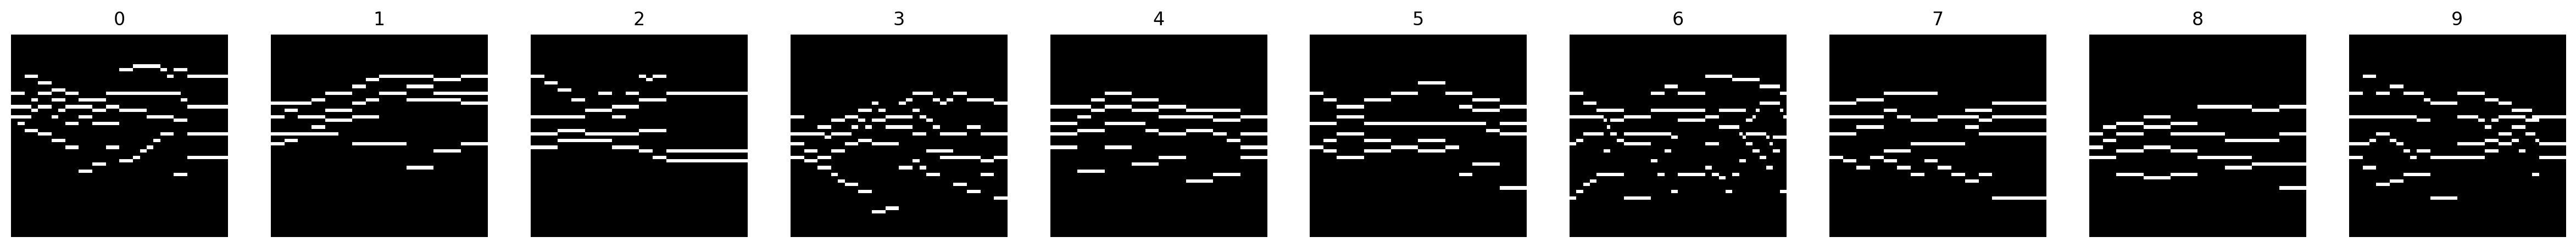

(338, 64, 60, 1)

In [4]:
def jg_plot_rep_dane_wej(piano_representations, start):
    fig = plt.figure(figsize=(30,10))
    
    axs = fig.subplots(1, 10)

    for i in range(10):        
        axs[i].axis('off')        
        # plot raw pixel data
    #     plt.imshow(piano_representations[i], cmap='gray')
        new_my_pianoroll_rep1 =  np.rot90 (piano_representations[i+ start])
        axs[i].imshow(new_my_pianoroll_rep1, cmap='gray')
        axs[i].set_title(str(i+ start))
    plt.show()
    
for i in range (1) :    
    jg_plot_rep_dane_wej(train_X, 10 * i) 
train_X.shape    

### Vizualizacja 1 reprezentacji

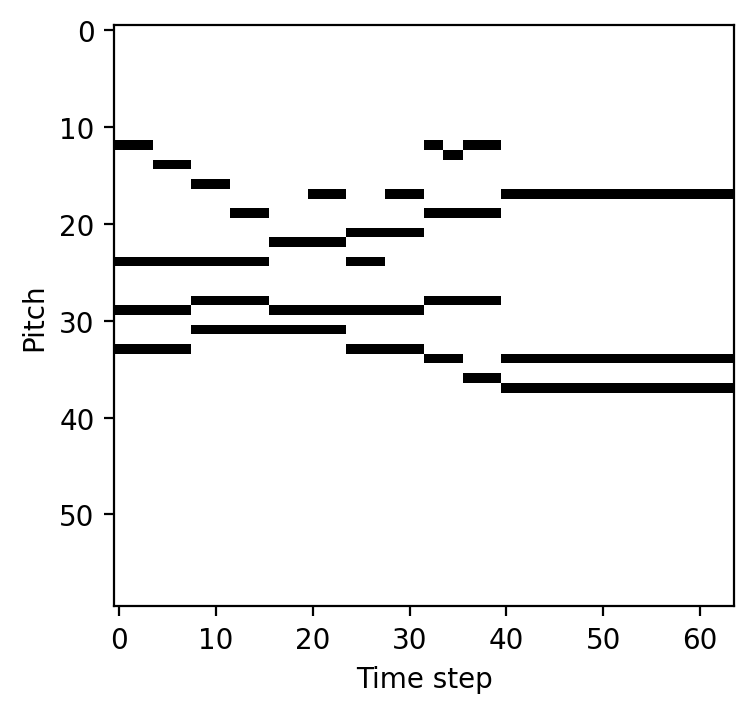

In [11]:
import matplotlib.pyplot as plt
def jg_plot_1_rep_dane_wej(piano_represent_in):
    fig = plt.figure(figsize=(4,4))
    
    axs = fig.subplots(1, 1) 
    
       
    # plot raw pixel data
#     plt.imshow(piano_representations[i], cmap='gray')
    new_my_pianoroll_rep1 =  np.rot90 (piano_represent_in)
    new_my_pianoroll_rep1 = 1 - new_my_pianoroll_rep1
    axs.imshow(new_my_pianoroll_rep1, cmap='gray')
#         axs[i].set_title(str(i+ start))
#     axs.set_title('Piano-roll representation')
    axs.set_xlabel('Time step')
#     axs.set_xlabel('Czas')
#     axs.set_ylabel('Wysokość dźwięku')
    axs.set_ylabel('Pitch')
#     axs.axis('off') 
#     axs.invert_yaxis()
#     axs.get_xaxis().set_visible(False)
#     axs.get_yaxis().set_visible(False)
    plt.show()
    
jg_plot_1_rep_dane_wej(train_X[2])   # sad 
# jg_plot_1_rep_dane_wej(train_X[3])   # happy 
# jg_plot_1_rep_dane_wej(train_X[4])   # happy

In [5]:
EXP_CONFIG['exp_name']


'jacekbachdata_train_enc_proposed_3_dec_proposed_3'

## VAE training

In [6]:
# %%time
# # # encoder = define_encoder()
# # # decoder = define_decoder()

# # # vae = VAE(encoder, decoder)
# # vae = VAE('vae')
# # vae.compile(optimizer=opt)

# # # clb = tf.keras.callbacks.EarlyStopping(monitor="reconstruction_loss",  patience=10)
# # history_vae = vae.fit(X_data,  epochs=epochs, batch_size=BATCH_SIZE  )  

# loss_all = []
# reconstruction_loss_all = []
# kl_loss_all = []

# vae = VAE(MODEL_CONFIG)
# opt = keras.optimizers.Adam(1e-4)
# vae.compile(optimizer = opt)
# # vae.fit(X_data, epochs = TRAIN_CONFIG['num_epoch'], batch_size = MODEL_CONFIG['batch_size'])

# print('{:=^80}'.format(' Training Start  epochs={}, batch_size={} '.format (TRAIN_CONFIG['num_epoch'], 
#                                                               MODEL_CONFIG['batch_size'])))

# training_start_time = time.time()    
# for epoch in range(TRAIN_CONFIG['num_epoch']):
#     print('{:-^80}'.format(' Epoch {} Start '.format(epoch+1)))

#     history = vae.fit(train_X, epochs=1, batch_size=MODEL_CONFIG['batch_size'])
    
#     loss_all.append(history.history['loss'][0])
#     reconstruction_loss_all.append(history.history['reconstruction_loss'][0])
#     kl_loss_all.append(history.history['kl_loss'][0])
    
#     # run evaluation
#     if TRAIN_CONFIG['evaluate_along_training']:
#         if (epoch+1) % 20 == 0:
#             vae.run_sampler(epoch)
#             vae.run_eval(epoch)
            
# # print epoch info
# training_time  = time.time() - training_start_time
# if  TRAIN_CONFIG['verbose']:
#     print("time   {:8.2f} s".format(  training_time))                 

In [7]:
# print("{:d}, {:.4f}, {:.4f}, {:.4f} \n".format(
#                 epoch, history.history['loss'][0], history.history['reconstruction_loss'][0], history.history['kl_loss'][0]
#             )
#       )

# Użycie sieci decoder w celu wygenerowania obrazów na podstawie dowolnej niejawnej przestrzeni wektorów:

In [8]:
latent_dim = MODEL_CONFIG['latent_dim']
z_sample = np.zeros([latent_dim])
z_sample
z_sample [0] = 0.5
z_sample [1] = -0.5
# grid_x = np.linspace(-1, 1, 10)
# grid_x
z_sample.shape
z_sample = np.reshape(z_sample, (1, latent_dim) )
z_sample.shape

(1, 32)

## Testowanie modelu

In [5]:
# train_X = load_data()
train_X, train_y = load_data_emo()
# vae = VAE(MODEL_CONFIG)

vae = CVAE(MODEL_CONFIG)
# opt = keras.optimizers.Adam(1e-4)
# vae.compile(optimizer=opt)
epoch = 70  # 80, 100, 60, 200   # testy base zrobiono dla 100 epok
vae.load_model(epoch)


[*] Loading data...
train_X.shape (338, 64, 60)
train_X.shape (338, 64, 60, 1)
train_y.shape (338,)
train_y: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3]
train_y: 
 [1 3 2 0 2 2 0 3 2 0 1 2 3 0 1 0 2 1 0 0 3 3 3 1 1 1 1 1 0 0 1 1 2 0 3 1 3
 3 0 0 2 2 2 2 3 0 1 0 1 1 1 0 3 3 0 2 0 3 3 3 1 1 1 2 0 0 0 1 0 2 1 3 3 0
 2 3 2 0 2 1 2 0 0 2 1 2 2 2 1 1 1 3 0 1 

2023-01-18 12:44:31.817068: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-18 12:44:31.847488: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-18 12:44:31.848909: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-18 12:44:31.850867: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "CVAE_encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 emotion_labels (InputLayer)    [(None, 4)]          0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 3840)         19200       ['emotion_labels[0][0]']         
                                                                                                  
 pianoroll (InputLayer)         [(None, 64, 60, 1)]  0           []                               
                                                                                                  
 reshape_1 (Reshape)            (None, 64, 60, 1)    0           ['dense_2[0][0]']                
                                                                                       

## Test run_sampler

z_sample.shape:  (10, 32)
cond_num.shape:  (10, 1)
0 1 2 3 0 1 2 3 0 1 
condition_emo.shape:  (10, 4)
condition_emo[0]:  [1. 0. 0. 0.]
1/1 [==============================] - 0s 19ms/step
x_decoded.shape:  (10, 64, 60, 1)
./../result_dir/Samples_10_images_0071_vae_rounded.png


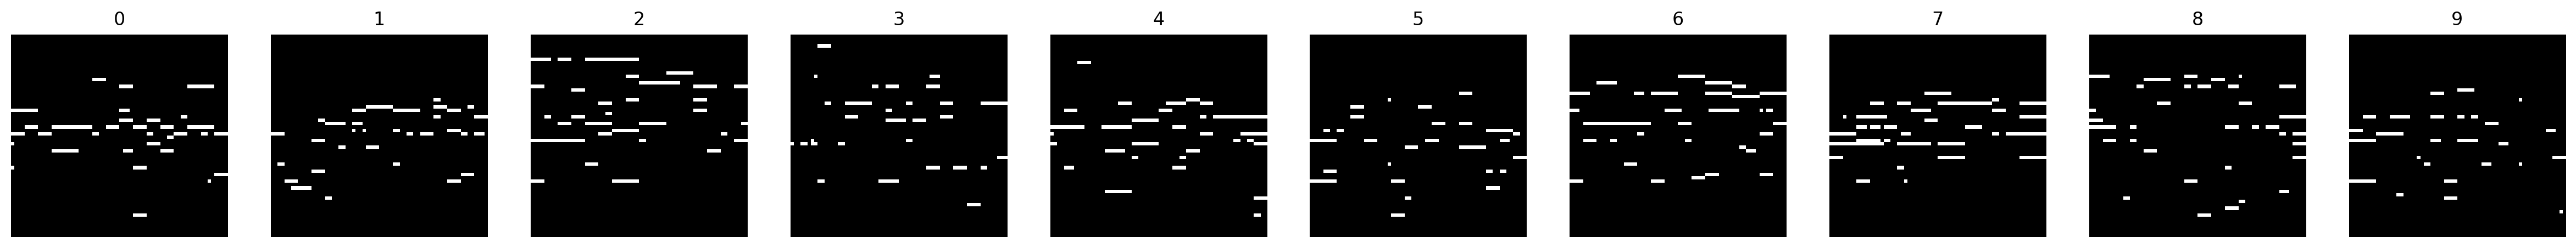

In [7]:
# Generuje ilość num_sample labels  with values [0-4 ]
def jg_generate_labels(num_sample):
    cond_num = np.zeros( (num_sample, 1) ) 
    print("cond_num.shape: ", cond_num.shape)
    for i in range(num_sample):
        ind = (i % 4)
        print(ind, end = ' ')
        cond_num[i] = ind
    print()    
    condition_emo = to_categorical(cond_num, 4) 
    print("condition_emo.shape: ", condition_emo.shape)
    return condition_emo

# Plot piano_representations 
def jg_plot_rep(piano_representations, epoch, config, name):
    fig = plt.figure(figsize=(30,20))
    
    num_samples = piano_representations.shape[0]
    axs = fig.subplots(1, num_samples)
    
    for i in range(num_samples):        
        axs[i].axis('off')       
        new_my_pianoroll_rep1 =  np.rot90 (piano_representations[i])
#         new_my_pianoroll_rep1 = 1 - new_my_pianoroll_rep1 
        
        axs[i].imshow(new_my_pianoroll_rep1, cmap='gray')
        axs[i].set_title(str(i))
    
#     epoch = epochs
    filename1 = 'Samples_%s_images_%04d_%s.png' % (num_samples, epoch+1, name)
    path = os.path.join(config['result_dir'], filename1)
    print (path)
    plt.savefig(path)      
    plt.show()
    
def jg_run_sampler(vae, epoch, config):  
    num_sample = config['num_sample']
    latent_dim = config['latent_dim']
    z_sample = tf.random.normal(shape=(num_sample, latent_dim ))
    print("z_sample.shape: ", z_sample.shape) 
    
    condition_emo = jg_generate_labels(num_sample)
    print("condition_emo[0]: ", condition_emo[0]) 
    x_decoded = vae.decoder.predict([z_sample, condition_emo])
    x_decoded_round = x_decoded > 0.5
    
    print("x_decoded.shape: ", x_decoded.shape) 

    jg_plot_rep(x_decoded_round, epoch, config, name = 'vae_rounded') 
    return x_decoded_round

# result_dir = './../result_dir/'
samples = jg_run_sampler(vae, epoch, MODEL_CONFIG)

## Test  jg_back_to_pianoroll

In [8]:
def jg_back_to_pianoroll(samples):    
    print("samples: ", samples.shape) 

    samples_piano_representations_arr = np.reshape (samples, (samples.shape[0], samples.shape[1], samples.shape[2] ) )
    samples_p_rep = samples_piano_representations_arr
    samples_pianoroll_rep =  np.pad(samples_p_rep, ( (0, 0), (0, 0), (25, 43)) , 'constant', constant_values=( 0, 0))
    print("samples_pianoroll_rep.shape: ", samples_pianoroll_rep.shape)
    return samples_pianoroll_rep

def jg_save_midi_samples(samples_pianoroll, epoch, config):    
    for i in range(samples_pianoroll.shape[0]):
        my_music = muspy.from_pianoroll_representation (samples_pianoroll[i], resolution=4, encode_velocity=False)
        
#         print(my_music)
        filename1 = 'MIDI_epoch_%04d_%s.mid' % (epoch, i )
        path = os.path.join(config['result_dir'], filename1)
        muspy.write_midi(path , my_music)
        print('MIDI saved to %s' % path)

samples_pianoroll =  jg_back_to_pianoroll(samples)  
        
jg_save_midi_samples(samples_pianoroll, epoch, MODEL_CONFIG)    

samples:  (10, 64, 60, 1)
samples_pianoroll_rep.shape:  (10, 64, 128)
MIDI saved to ./../result_dir/MIDI_epoch_0070_0.mid
MIDI saved to ./../result_dir/MIDI_epoch_0070_1.mid
MIDI saved to ./../result_dir/MIDI_epoch_0070_2.mid
MIDI saved to ./../result_dir/MIDI_epoch_0070_3.mid
MIDI saved to ./../result_dir/MIDI_epoch_0070_4.mid
MIDI saved to ./../result_dir/MIDI_epoch_0070_5.mid
MIDI saved to ./../result_dir/MIDI_epoch_0070_6.mid
MIDI saved to ./../result_dir/MIDI_epoch_0070_7.mid
MIDI saved to ./../result_dir/MIDI_epoch_0070_8.mid
MIDI saved to ./../result_dir/MIDI_epoch_0070_9.mid


In [12]:
tensor_out = np.array([0.0, 0.4, 0.6, 0.9])
test_round = tensor_out > 0.5
test_round

array([False, False,  True,  True])

## Back to Pianoroll

In [13]:
# latent_dim = MODEL_CONFIG['latent_dim']
# num_sample = MODEL_CONFIG['num_sample']

# z_sample = tf.random.normal(shape=(num_sample, latent_dim))

# x_decoded = vae.decoder.predict(z_sample)
# x_decoded_round = x_decoded > 0.5
# print("x_decoded_round: ", x_decoded_round.shape) 

# piano_representations_arr = np.reshape (x_decoded_round[0],(x_decoded_round.shape[1],x_decoded_round.shape[2] ) )
# p_rep = piano_representations_arr
# my_pianoroll_rep =  np.pad(p_rep, ( (0, 0), (25, 43)) , 'constant', constant_values=(0, 0))
# print("my_pianoroll_rep.shape: ", my_pianoroll_rep.shape)


# my_music = muspy.from_pianoroll_representation (my_pianoroll_rep, resolution=4, encode_velocity=False)
# # my_music = muspy.from_pianoroll_representation (my_pianoroll_rep, encode_velocity=False)
# my_music.show_score()
# # my_music.show_pianoroll()
# print(my_music)
# muspy.write_midi('./temp_new.mid', my_music)


In [14]:
# import IPython.display as ipd
# sr = 44100 # sample rate
# ipd.Audio('./temp_new.wav',)

## Wizualizacjia latent space z grupami klas cyfr

train_y_onehot.shape:  (338, 4)
train_y_onehot[0]:  [0. 1. 0. 0.]
11/11 [==============================] - 1s 38ms/step


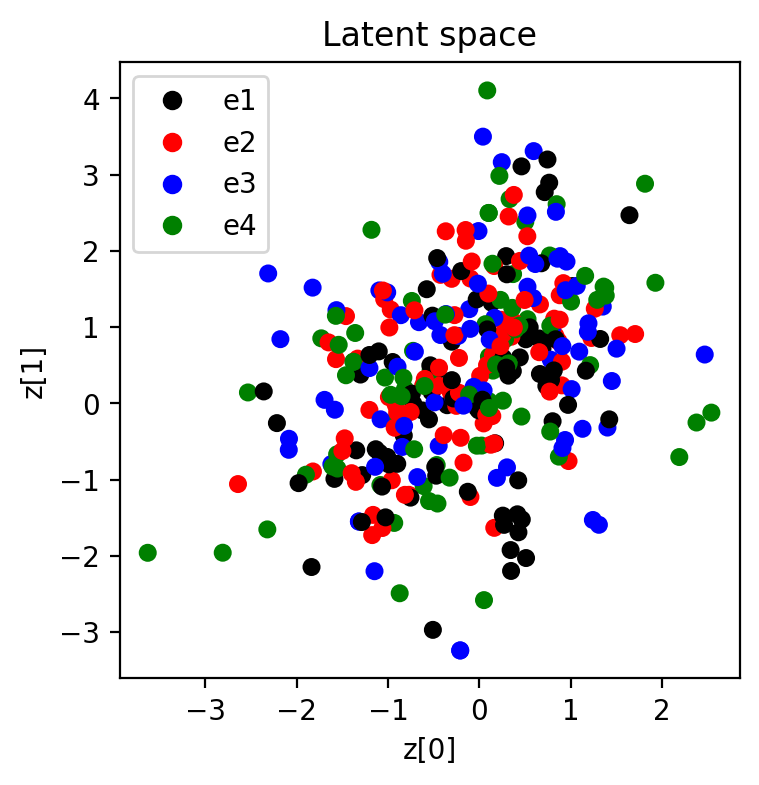

z_mean.shape (338, 32)
0 mean:  -0.14778352 std:  0.9729529
1 mean:  0.390851 std:  1.2300667
2 mean:  0.70428514 std:  0.7834564
3 mean:  -0.6864368 std:  0.97966707
4 mean:  0.20845342 std:  0.96035856
5 mean:  -0.05300935 std:  1.2061727
6 mean:  1.3233477 std:  1.501247
7 mean:  -0.32045454 std:  0.91330737
8 mean:  0.081792854 std:  0.77072966
9 mean:  0.06892836 std:  1.0757499
10 mean:  0.61593956 std:  0.77096736
11 mean:  0.37681356 std:  0.9633378
12 mean:  0.36588064 std:  1.3581254
13 mean:  0.22525129 std:  1.0366044
14 mean:  -0.4514259 std:  1.4587188
15 mean:  0.46272346 std:  0.9577497
16 mean:  0.13619788 std:  1.1024942
17 mean:  0.40471476 std:  1.2149737
18 mean:  0.24716918 std:  1.2864586
19 mean:  -0.53279924 std:  0.75928843
20 mean:  0.4249042 std:  1.2594205
21 mean:  0.6439987 std:  0.8655761
22 mean:  0.421565 std:  0.74920505
23 mean:  -0.53509766 std:  1.0223876
24 mean:  -0.11557429 std:  1.169644
25 mean:  0.29159728 std:  1.085215
26 mean:  0.15758228 

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_label_clusters(vae, data, y_data_kat, name):
    # display a 2D plot of the digit classes in the latent space
    train_y_onehot =  labels_to_categorical(y_data_kat)
    
    z_mean, _, _ = vae.encoder.predict([data, train_y_onehot])    
    osX = 0
    osY = 1
    plt.figure(figsize=(4, 4))    

#     cdict = {0: 'black', 1: 'red', 2: 'blue', 3: 'green'}
#     emo = {0: 'e1', 1: 'e2', 2: 'e3', 3: 'e4'}   
   
    classes = ['e1', 'e2', 'e3', 'e4']
    colors = ListedColormap(['black', 'red', 'blue', 'green'])
    scatter = plt.scatter(z_mean[:, osX], z_mean[:, osY], c=y_data_kat, cmap=colors, s = 30)
    #add legend with class names

    plt.legend(handles=scatter.legend_elements()[0], labels=classes)       

    plt.title("Latent space")   
    plt.xlabel ("z["+ str(osX) + "]")  
    plt.ylabel ("z["+ str(osY) + "]")  
#     ax2.legend()
#     epoch = epoch
    filename1 = 'VAE-subcl_latent_space_cat_%04d_%s.png' % (epoch, name)
    plt.savefig(filename1)
    plt.show()  

    print ("z_mean.shape", z_mean.shape)    
    for j in range(0, z_mean.shape[1]):
        a = z_mean[:,j]
#         print (a.shape)
        print (j, "mean: ", np.mean(a), "std: ", np.std(a) )       

# plot_label_clusters(sigma_vae, X_data_kat, y_data_kat, name = 'sigma_vae' )
X_data_kat = train_X
y_data_kat =  train_y

plot_label_clusters(vae, X_data_kat, y_data_kat, name = 'vae'  )

In [16]:
unique_numbers = list(set(y_data_kat))
unique_numbers

[0, 1, 2, 3]

## Wizualizacjia strat total_loss,  reconstruction_loss i kl_loss

In [17]:
# history.history.keys()
# len(history.history['loss'])

In [18]:
# import matplotlib.pyplot as plt
# def jg_show_loss(loss, reconstruction_loss, kl_loss, name):  
#     epoki = range(len(loss))

#     plt.figure()

#     plt.plot(epoki, loss, 'ro', label='total_loss')
#     plt.plot(epoki, reconstruction_loss, 'g', label ='reconstruction_loss')
#     plt.plot(epoki, kl_loss, 'b', label= 'kl_loss')
#     plt.title('Strata trenowania')
#     plt.legend()

#     epoch = len(loss)
#     filename1 = 'VAE-subcl_Loss_%04d_%s.png' % (epoch, name)
#     plt.savefig(filename1)
#     plt.show()

# # show_loss_JG(history_sigma_vae, name = 'sigma_vae' )

# loss = loss_all
# reconstruction_loss = reconstruction_loss_all
# kl_loss = kl_loss_all
# jg_show_loss(loss, reconstruction_loss, kl_loss, name = 'vae' )

## Zapis i odczyt modelu 

In [19]:
from tensorflow import keras
# encoder.save('VAE-class-encoder.h5')
# decoder.save('VAE-class-decoder.h5')
# vae.decoder.save('VAE-class-decoder.h5')
# vae.save('VAE-class-decoder.h5')
# vae.save('VAE-class.h5')

In [20]:
from tensorflow.keras.models import load_model

# encoder = load_model('VAE-class-encoder.h5')
# decoder = load_model('VAE-subcl_decoder_0300_vae.h5')
# decoder = load_model('VAE-class-decoder.h5')

In [21]:
# vae.run_sampler(epoch, save_midi= False)
# emo=0
# vae.run_sampler_emo(epoch, emo, save_midi=True )  # generowanie plików z emo


## Porownanie Wej- Wyj Autoencodera CVAE

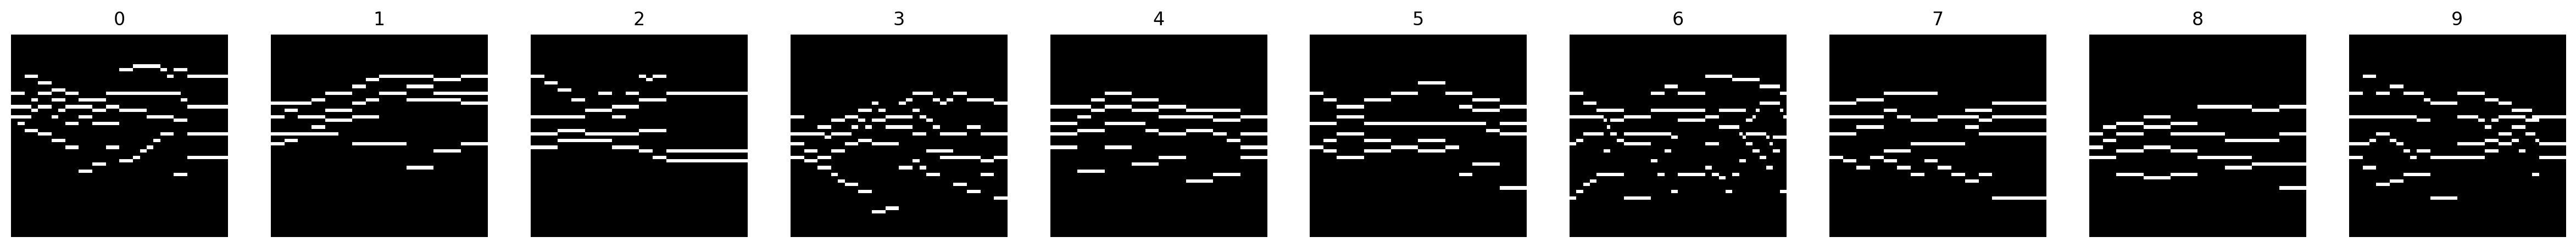

vae_input[0:10].shape :  (10, 64, 60, 1)
train_y[0:10] :  [1 3 2 0 2 2 0 3 2 0]


In [10]:
num_sample = 10
vae_input = train_X[0:num_sample]
# vae_input = test_X[0:10]

jg_plot_rep_dane_wej(vae_input, 0 )
print("vae_input[0:10].shape : ", vae_input[0:num_sample].shape ) # vae.predict

print("train_y[0:10] : ", train_y[0:num_sample])

train_y_onehot.shape:  (10, 4)
train_y_onehot[0]:  [0. 1. 0. 0.]
1/1 [==============================] - 0s 342ms/step
output.shape:  (10, 64, 60, 1)
/mnt/94B05EE7B05ECF7C/Users/Ja/UczenieMasz-MuzGen-VAE/JG-VAE-4voice/exp/jacekbachdata_train_enc_proposed_3_dec_proposed_3/samples/CVAE_Samples_10_images_0070_vae_rounded.png
CVAE_Samples_10_images_0070_vae_rounded.png was saved to /mnt/94B05EE7B05ECF7C/Users/Ja/UczenieMasz-MuzGen-VAE/JG-VAE-4voice/exp/jacekbachdata_train_enc_proposed_3_dec_proposed_3/samples/CVAE_Samples_10_images_0070_vae_rounded.png


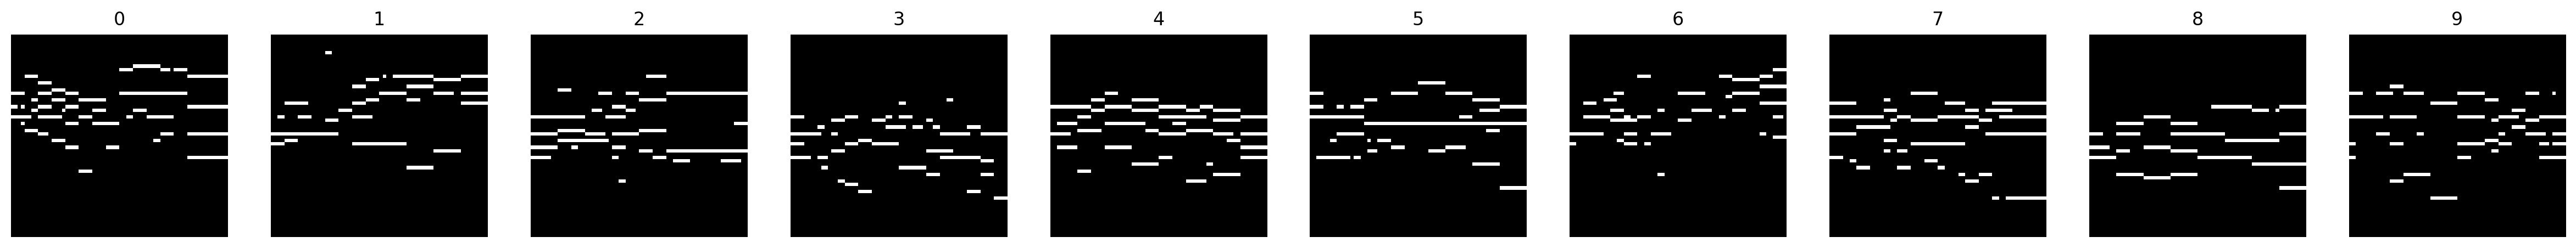

In [11]:
num_sample = 10

train_y_onehot =  labels_to_categorical(train_y[0:num_sample])
train_y_onehot

# # vae_output = vae.predict(vae_input)
vae_output = vae.predict([vae_input, train_y_onehot])
vae_output = vae_output > 0.5
print("output.shape: ", vae_output.shape) 
# epoch = 0
vae.jg_plot_rep(vae_output, epoch, name = 'vae_rounded') 
# jg_plot_rep(vae_output, epoch, MODEL_CONFIG, name = 'vae_rounded') 

### Graj wej , graj wyj - Zapis output MIDI

In [244]:
samples_pianoroll =  jg_back_to_pianoroll(vae_output)  
epoch = 9         
jg_save_midi_samples(samples_pianoroll, epoch, MODEL_CONFIG)  

samples_pianoroll =  jg_back_to_pianoroll(vae_input)  
epoch = 0       
samples_pianoroll = samples_pianoroll > 0.5  # zamiana na bool
jg_save_midi_samples(samples_pianoroll, epoch, MODEL_CONFIG) 

samples:  (10, 64, 60, 1)
samples_pianoroll_rep.shape:  (10, 64, 128)
MIDI saved to ./../result_dir/MIDI_epoch_0009_0.mid
MIDI saved to ./../result_dir/MIDI_epoch_0009_1.mid
MIDI saved to ./../result_dir/MIDI_epoch_0009_2.mid
MIDI saved to ./../result_dir/MIDI_epoch_0009_3.mid
MIDI saved to ./../result_dir/MIDI_epoch_0009_4.mid
MIDI saved to ./../result_dir/MIDI_epoch_0009_5.mid
MIDI saved to ./../result_dir/MIDI_epoch_0009_6.mid
MIDI saved to ./../result_dir/MIDI_epoch_0009_7.mid
MIDI saved to ./../result_dir/MIDI_epoch_0009_8.mid
MIDI saved to ./../result_dir/MIDI_epoch_0009_9.mid
samples:  (10, 64, 60, 1)
samples_pianoroll_rep.shape:  (10, 64, 128)
MIDI saved to ./../result_dir/MIDI_epoch_0000_0.mid
MIDI saved to ./../result_dir/MIDI_epoch_0000_1.mid
MIDI saved to ./../result_dir/MIDI_epoch_0000_2.mid
MIDI saved to ./../result_dir/MIDI_epoch_0000_3.mid
MIDI saved to ./../result_dir/MIDI_epoch_0000_4.mid
MIDI saved to ./../result_dir/MIDI_epoch_0000_5.mid
MIDI saved to ./../result_di

### Generowanie condition_emo test

In [10]:
num_sample = MODEL_CONFIG['num_sample']
latent_dim = MODEL_CONFIG['latent_dim']
z_sample = tf.random.normal(shape=(num_sample, latent_dim))
print("z_sample.shape: ", z_sample.shape)    

condition_emo = jg_generate_labels(num_sample)  

print('condition_emo: ', condition_emo)
print('condition_emo.shape: ', condition_emo.shape)

z_sample.shape:  (10, 32)
cond_num.shape:  (10, 1)
0 1 2 3 0 1 2 3 0 1 
condition_emo.shape:  (10, 4)
condition_emo:  [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]
condition_emo.shape:  (10, 4)


## Generation new Emo seqence

randomVec.shape:  (1, 32)
condition_emo:  [[1. 0. 0. 0.]]
condition_emo.shape:  (1, 4)
1/1 [==============================] - 0s 392ms/step
x_decoded_round.shape:  (1, 64, 60, 1)
samples:  (1, 64, 60, 1)
samples_pianoroll_rep.shape:  (1, 64, 128)


/home/jacek/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 108 (l) missing from current font.
  func(*args, **kwargs)
/home/jacek/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 112 (p) missing from current font.
  func(*args, **kwargs)
/home/jacek/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/jacek/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


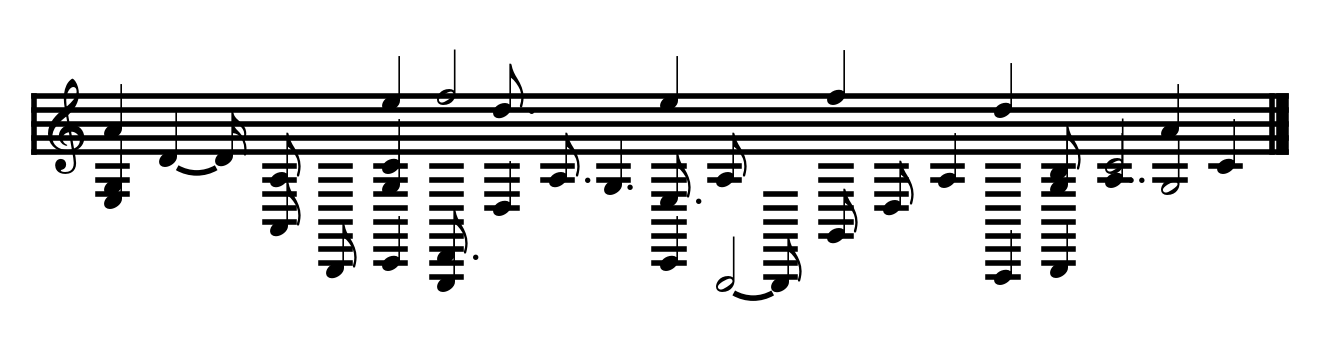

In [12]:
# Funkcja generująca sekwencje x_decoded_round o danej emocji emo={0, 1, 2, 3}
def jg_generate_seq_emo(emo):
    latent_dim = MODEL_CONFIG['latent_dim']
    num_sample = 1
    # Generate chords from randomly generated latent vector
    randomVec = np.random.normal(scale=1, size=(num_sample,latent_dim))
#     print('randomVec: ', randomVec)
    print('randomVec.shape: ', randomVec.shape)    

    cond_num = emo 
    condition_emo = to_categorical(cond_num, 4).reshape(1,-1)
    print('condition_emo: ', condition_emo)
    print('condition_emo.shape: ', condition_emo.shape)

    x_decoded = vae.decoder.predict([randomVec, condition_emo])
    x_decoded_round = x_decoded > 0.5
    print ('x_decoded_round.shape: ', x_decoded_round.shape)        
    return x_decoded_round

samples = jg_generate_seq_emo(0)
samples_pianoroll =  jg_back_to_pianoroll(samples) 

# jg_save_midi_samples(samples_pianoroll, epoch, MODEL_CONFIG)   

my_music = muspy.from_pianoroll_representation (samples_pianoroll[0], resolution=4, encode_velocity=False)
my_music.show_score()
# my_music.show_pianoroll()
# print(my_music)
muspy.write_midi('./../result_dir/temp_new.mid', my_music)
        
# jg_save_midi_samples(samples_pianoroll, epoch, MODEL_CONFIG) 
# jg_print_score(generatedSequence_onehot[0, :])

## Generowanie zbiorów plikow seq do dir e1-e4

In [13]:
import os
# liczba_plikow = 5
liczba_plikow = 20
emo = {0: 'e1', 1: 'e2', 2: 'e3', 3: 'e4'}
emo_arr = [0, 1, 2, 3]
gen_dir = './../generatedSeq/'

for j in range(len(emo)): 
    directory = emo[j] + "/"
    path = os.path.join(gen_dir, directory) 
    print("path: ", path)
    print("**********************************************************************")
    
    res = []
    for i in range(liczba_plikow):    
        samples = jg_generate_seq_emo(emo_arr[j])
        samples_pianoroll =  jg_back_to_pianoroll(samples)
        my_new_music = muspy.from_pianoroll_representation (samples_pianoroll[0], resolution=4, encode_velocity=False)
#         my_new_music.show_score()
#         my_new_music.show_pianoroll()

        file_name = path + 'new_generated_'+ str(i)+ '.mid'
        muspy.write_midi(file_name, my_new_music)        
        
        if hasattr(res, 'shape'): 
            print("Jest shape")
            res = np.concatenate((res, samples_pianoroll), axis=0)
        else:
            print("Brak shape")
            res = samples_pianoroll            
                
    print("res.shape: ", res.shape) 
    
score_matrix_mean = vae.samples_metrics.eval(res, epoch, True)    


path:  ./../generatedSeq/e1/
**********************************************************************
randomVec.shape:  (1, 32)
condition_emo:  [[1. 0. 0. 0.]]
condition_emo.shape:  (1, 4)
1/1 [==============================] - 0s 20ms/step
x_decoded_round.shape:  (1, 64, 60, 1)
samples:  (1, 64, 60, 1)
samples_pianoroll_rep.shape:  (1, 64, 128)
Brak shape
randomVec.shape:  (1, 32)
condition_emo:  [[1. 0. 0. 0.]]
condition_emo.shape:  (1, 4)
1/1 [==============================] - 0s 18ms/step
x_decoded_round.shape:  (1, 64, 60, 1)
samples:  (1, 64, 60, 1)
samples_pianoroll_rep.shape:  (1, 64, 128)
Jest shape
randomVec.shape:  (1, 32)
condition_emo:  [[1. 0. 0. 0.]]
condition_emo.shape:  (1, 4)
1/1 [==============================] - 0s 23ms/step
x_decoded_round.shape:  (1, 64, 60, 1)
samples:  (1, 64, 60, 1)
samples_pianoroll_rep.shape:  (1, 64, 128)
Jest shape
randomVec.shape:  (1, 32)
condition_emo:  [[1. 0. 0. 0.]]
condition_emo.shape:  (1, 4)
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 25ms/step
x_decoded_round.shape:  (1, 64, 60, 1)
samples:  (1, 64, 60, 1)
samples_pianoroll_rep.shape:  (1, 64, 128)
Jest shape
randomVec.shape:  (1, 32)
condition_emo:  [[0. 1. 0. 0.]]
condition_emo.shape:  (1, 4)
1/1 [==============================] - 0s 22ms/step
x_decoded_round.shape:  (1, 64, 60, 1)
samples:  (1, 64, 60, 1)
samples_pianoroll_rep.shape:  (1, 64, 128)
Jest shape
randomVec.shape:  (1, 32)
condition_emo:  [[0. 1. 0. 0.]]
condition_emo.shape:  (1, 4)
1/1 [==============================] - 0s 25ms/step
x_decoded_round.shape:  (1, 64, 60, 1)
samples:  (1, 64, 60, 1)
samples_pianoroll_rep.shape:  (1, 64, 128)
Jest shape
randomVec.shape:  (1, 32)
condition_emo:  [[0. 1. 0. 0.]]
condition_emo.shape:  (1, 4)
1/1 [==============================] - 0s 23ms/step
x_decoded_round.shape:  (1, 64, 60, 1)
samples:  (1, 64, 60, 1)
samples_pianoroll_rep.shape:  (1, 64, 128)
Jest shape
randomVec.shape:  (1, 32)
condition_emo:  [[0. 1. 0. 0.]]
c

1/1 [==============================] - 0s 18ms/step
x_decoded_round.shape:  (1, 64, 60, 1)
samples:  (1, 64, 60, 1)
samples_pianoroll_rep.shape:  (1, 64, 128)
Jest shape
randomVec.shape:  (1, 32)
condition_emo:  [[0. 0. 0. 1.]]
condition_emo.shape:  (1, 4)
1/1 [==============================] - 0s 22ms/step
x_decoded_round.shape:  (1, 64, 60, 1)
samples:  (1, 64, 60, 1)
samples_pianoroll_rep.shape:  (1, 64, 128)
Jest shape
randomVec.shape:  (1, 32)
condition_emo:  [[0. 0. 0. 1.]]
condition_emo.shape:  (1, 4)
1/1 [==============================] - 0s 24ms/step
x_decoded_round.shape:  (1, 64, 60, 1)
samples:  (1, 64, 60, 1)
samples_pianoroll_rep.shape:  (1, 64, 128)
Jest shape
randomVec.shape:  (1, 32)
condition_emo:  [[0. 0. 0. 1.]]
condition_emo.shape:  (1, 4)
1/1 [==============================] - 0s 18ms/step
x_decoded_round.shape:  (1, 64, 60, 1)
samples:  (1, 64, 60, 1)
samples_pianoroll_rep.shape:  (1, 64, 128)
Jest shape
randomVec.shape:  (1, 32)
condition_emo:  [[0. 0. 0. 1.]]
c

In [80]:
MODEL_CONFIG['sample_dir']

'/mnt/94B05EE7B05ECF7C/Users/Ja/UczenieMasz-MuzGen-VAE/JG-VAE-4voice/exp/jacekbachdata_train_enc_proposed_3_dec_proposed_3/samples'